In [70]:
# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
## 그래프 한글 처리하는 코드
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [72]:
df_corona = pd.read_csv('./data/covid_data.csv')

In [73]:
df_corona = df_corona[:-1]
df_corona['신규발생'] = df_corona['신규발생'].astype(int)
df_corona['계'] = df_corona['계'].astype(int)
df_corona['사망'] = df_corona['사망'].astype(int)
df_corona['누적사망'] = df_corona['누적사망'].astype(int)
df_corona

,일자,국가코드,국가,신규발생,계,사망,누적사망
0,2020-01-20,AF,Afghanistan,0,0,0,0
1,2020-01-21,AF,Afghanistan,0,0,0,0
2,2020-01-22,AF,Afghanistan,0,0,0,0
3,2020-01-23,AF,Afghanistan,0,0,0,0
4,2020-01-24,AF,Afghanistan,0,0,0,0
...,...,...,...,...,...,...,...
221827,2022-08-08,ZW,Zimbabwe,10,256487,0,5584
221828,2022-08-09,ZW,Zimbabwe,3,256490,2,5586
221829,2022-08-10,ZW,Zimbabwe,2,256492,1,5587
221830,2022-08-11,ZW,Zimbabwe,21,256513,0,5587


In [74]:
df_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221832 entries, 0 to 221831
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   일자      221832 non-null  object
 1   국가코드    220896 non-null  object
 2   국가      221832 non-null  object
 3   신규발생    221832 non-null  int32 
 4   계       221832 non-null  int32 
 5   사망      221832 non-null  int32 
 6   누적사망    221832 non-null  int32 
dtypes: int32(4), object(3)
memory usage: 8.5+ MB


In [75]:
df_corona.rename(columns={'국가':'국가명(영문)'}, inplace=True)

In [76]:
df_corona = df_corona[['일자','국가코드','신규발생','계','사망','누적사망']]
df_corona.rename(columns={'신규발생':'확진자', '계':'누적 확진자','사망':'사망자', '누적사망':'누적 사망자'}, inplace=True)
df_corona

,일자,국가코드,확진자,누적 확진자,사망자,누적 사망자
0,2020-01-20,AF,0,0,0,0
1,2020-01-21,AF,0,0,0,0
2,2020-01-22,AF,0,0,0,0
3,2020-01-23,AF,0,0,0,0
4,2020-01-24,AF,0,0,0,0
...,...,...,...,...,...,...
221827,2022-08-08,ZW,10,256487,0,5584
221828,2022-08-09,ZW,3,256490,2,5586
221829,2022-08-10,ZW,2,256492,1,5587
221830,2022-08-11,ZW,21,256513,0,5587


In [77]:
df_public_data = pd.read_csv('./data/공공데이터_전처리.csv')  # 홍콩, 대만, 마카오 데이터 가져오기
del df_public_data['Unnamed: 0']

In [78]:
df_public_data

,일자,확진자,누적 확진자,사망자,누적 사망자,국가코드
0,2020-01-20,0,0,0,0,TW
1,2020-01-21,0,0,0,0,TW
2,2020-01-22,0,0,0,0,TW
3,2020-01-23,0,0,0,0,TW
4,2020-01-24,0,0,0,0,TW
...,...,...,...,...,...,...
2803,2022-08-08,0,791,0,6,MO
2804,2022-08-09,0,791,0,6,MO
2805,2022-08-10,0,791,0,6,MO
2806,2022-08-11,0,791,0,6,MO


In [79]:
df_corona = pd.concat([df_corona, df_public_data])  # WHO데이터 + 공공데이터
df_corona

,일자,국가코드,확진자,누적 확진자,사망자,누적 사망자
0,2020-01-20,AF,0,0,0,0
1,2020-01-21,AF,0,0,0,0
2,2020-01-22,AF,0,0,0,0
3,2020-01-23,AF,0,0,0,0
4,2020-01-24,AF,0,0,0,0
...,...,...,...,...,...,...
2803,2022-08-08,MO,0,791,0,6
2804,2022-08-09,MO,0,791,0,6
2805,2022-08-10,MO,0,791,0,6
2806,2022-08-11,MO,0,791,0,6


In [80]:
month_list = []
for d in df_corona['일자']:
    month_list.append(d[0:7])
month_list

df_corona['월단위 일자'] = month_list
df_corona

,일자,국가코드,확진자,누적 확진자,사망자,누적 사망자,월단위 일자
0,2020-01-20,AF,0,0,0,0,2020-01
1,2020-01-21,AF,0,0,0,0,2020-01
2,2020-01-22,AF,0,0,0,0,2020-01
3,2020-01-23,AF,0,0,0,0,2020-01
4,2020-01-24,AF,0,0,0,0,2020-01
...,...,...,...,...,...,...,...
2803,2022-08-08,MO,0,791,0,6,2022-08
2804,2022-08-09,MO,0,791,0,6,2022-08
2805,2022-08-10,MO,0,791,0,6,2022-08
2806,2022-08-11,MO,0,791,0,6,2022-08


In [81]:
df_nation = pd.read_csv('./data/Nation_code.csv', encoding='cp949')

In [82]:
df_nation.rename(columns={'ISO alpha2': '국가코드', '대륙명_공통 대륙코드':'대륙명(영문)', '대륙명_행정표준코드':'대륙명(한글)','영문명':'국가명(영문)', '한글명':'국가명(한글)'}, inplace=True)

In [83]:
df_nation = df_nation[['국가코드','대륙명(영문)','대륙명(한글)','국가명(영문)','국가명(한글)']]

In [84]:
df_nation

,국가코드,대륙명(영문),대륙명(한글),국가명(영문),국가명(한글)
0,GY,South America,남아메리카,Guyana,가이아나
1,VE,South America,남아메리카,Venezuela,베네수엘라
2,BO,South America,남아메리카,Bolivia,볼리비아
3,BR,South America,남아메리카,Brazil,브라질
4,SR,South America,남아메리카,Suriname,수리남
...,...,...,...,...,...
195,HU,Europe,유럽,Hungary,헝가리
196,KR,Asia,아시아,Republic of Korea,대한민국
197,MO,Asia,아시아,Macau,마카오
198,TW,Asia,아시아,Republic of China,대만


In [85]:
# 수정 전 국가명
print(list(df_nation['국가명(한글)']))
print(len(list(df_nation['국가명(한글)'])))

['가이아나', '베네수엘라', '볼리비아', '브라질', '수리남', '아르헨티나', '에콰도르', '우루과이', '칠레', '콜롬비아', '파라과이', '페루', '과테말라', '그레나다', '니카라과', '도미니카공화국', '도미니카연방', '멕시코', '미국', '바베이도스', '바하마', '벨리즈', '세인트 루시아', '세인트 빈센트 그레나딘', '세인트 키츠 네비스', '아이티', '앤티가바부다', '엘살바도르', '온두라스', '자메이카', '캐나다', '코스타리카', '쿠바', '트리니다드토바고', '파나마', '네팔', '동티모르', '라오스', '레바논', '말레이시아', '몰디브', '몽골', '미얀마', '바레인', '방글라데시', '베트남', '부탄', '브루나이', '사우디아라비아', '스리랑카', '시리아', '싱가포르', '아랍에미리트', '아제르바이잔', '아프가니스탄', '예멘', '오만', '요르단', '우즈베키스탄', '이라크', '이란', '이스라엘', '인도', '인도네시아', '일본', '조지아', '중국', '카자흐스탄', '카타르', '캄보디아', '쿠웨이트', '키르기즈', '타지키스탄', '태국', '투르크메니스탄', '파키스탄', '팔레스타인', '필리핀', '가나', '가봉', '감비아', '기니', '기니비사우', '나미비아', '나이지리아', '남수단', '남아프리카공화국', '니제르', '라이베리아', '레소토', '르완다', '리비아', '마다가스카르', '말라위', '말리', '모로코', '모리셔스', '모리타니아', '모잠비크', '베냉', '보츠와나', '부룬디', '부르키나파소', '상투메프린시페', '세네갈', '세이셸', '소말리아', '수단', '시에라리온', '알제리', '앙골라', '에리트레아', '에스와티니', '에티오피아', '우간다', '이집트', '잠비아', '적도기니', '중앙아프리카공화국', '지부티', '짐바브웨', '차드', '카메룬', '카보베르데', '케냐', '코모

In [86]:
with open("./data/국가명_대체.txt", "r", encoding='utf-8') as f:
    lines = f.readlines()
    
nation_replace_list = []

for line in lines:
    line = line.strip()
    line_split = line.split('->')
    nation_replace = [line_split[0].split("'")[1], line_split[1].split("'")[1]]  # [수출입데이터의 국가명, 코로나 데이터의 국가명]
    nation_replace_list.append(nation_replace)

for nation in nation_replace_list:
    df_nation.loc[df_nation['국가명(한글)'] == nation[1],'국가명(한글)'] = nation[0]


In [87]:
# 수정 후 국가명
print(list(df_nation['국가명(한글)']))
print(len(list(df_nation['국가명(한글)'])))

['가이아나', '베네주엘라', '볼리비아', '브라질', '수리남', '아르헨티나', '에쿠아도르', '우루과이', '칠레', '콜롬비아', '파라과이', '페루', '과테말라', '그레나다', '니카라과', '도미니카 공화국', '도미니카', '멕시코', '미국', '바베이도스', '바하마', '벨리제', '세인트 루시아', '세인트 빈센트 그레나딘', '세인트 키츠 네비스', '아이티', '안티가 바부다', '엘살바도르', '온두라스', '자마이카', '캐나다', '코스타리카', '쿠바', '트리니다드토바고', '파나마', '네팔', '동티모르', '라오스', '레바논', '말레이시아', '몰디브', '몽골', '미얀마', '바레인', '방글라데시', '베트남', '부탄', '브루나이', '사우디아라비아', '스리랑카', '시리아', '싱가포르', '아랍에미리트 연합', '아제르바이잔', '아프카니스탄', '예맨', '오만', '요르단', '우즈베크', '이라크', '이란', '이스라엘', '인도', '인도네시아', '일본', '조지아', '중국', '카자흐스탄', '카타르', '캄보디아', '쿠웨이트', '키르기스스탄', '타지크', '태국', '투르크메니스탄', '파키스탄', '팔레스타인 해방기구', '필리핀', '가나', '가봉', '감비아', '기니', '기네비소', '나미비아', '나이지리아', '남수단', '남아프리카공화국', '니제르', '라이베리아', '레소토', '르완다', '리비아', '마다카스카르', '말라위', '말리', '모로코', '모리셔스', '모리타니', '모잠비크', '베닝', '보츠와나', '부룬디', '부르키나 파소', '상토메 프린스페', '세네갈', '세이쉘', '소말리아', '수단', '시에라 리온', '알제리', '앙골라', '에리트리아', '스와질랜드', '이디오피아', '우간다', '이집트', '잠비아', '적도 기니', '중앙아프리카공화국', '지부티', '짐바브웨', '챠드', '카메룬', '카보 베르데',

In [88]:
# 국가별 코로나데이터와 국가명 데이터 merge
df_corona2 = pd.merge(df_corona, df_nation, on=('국가코드'))

In [89]:
df_corona2

,일자,국가코드,확진자,누적 확진자,사망자,누적 사망자,월단위 일자,대륙명(영문),대륙명(한글),국가명(영문),국가명(한글)
0,2020-01-20,AF,0,0,0,0,2020-01,Asia,아시아,Afghanistan,아프카니스탄
1,2020-01-21,AF,0,0,0,0,2020-01,Asia,아시아,Afghanistan,아프카니스탄
2,2020-01-22,AF,0,0,0,0,2020-01,Asia,아시아,Afghanistan,아프카니스탄
3,2020-01-23,AF,0,0,0,0,2020-01,Asia,아시아,Afghanistan,아프카니스탄
4,2020-01-24,AF,0,0,0,0,2020-01,Asia,아시아,Afghanistan,아프카니스탄
...,...,...,...,...,...,...,...,...,...,...,...
187195,2022-08-08,MO,0,791,0,6,2022-08,Asia,아시아,Macau,마카오
187196,2022-08-09,MO,0,791,0,6,2022-08,Asia,아시아,Macau,마카오
187197,2022-08-10,MO,0,791,0,6,2022-08,Asia,아시아,Macau,마카오
187198,2022-08-11,MO,0,791,0,6,2022-08,Asia,아시아,Macau,마카오


In [90]:
df_corona2.to_csv('./data/해외코로나데이터.csv')

In [40]:
# 국가별 일별 코로나 신규확진자수
df_corona2.pivot_table(index=['국가코드','국가명(영문)'], columns='일자', values='확진자', aggfunc='sum')

,일자,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,...,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12
국가코드,국가명(영문),,,,,,,,,,,,,,,,,,,,,
AD,Andorra,0,0,0,0,0,0,0,0,0,0,...,0,285,0,0,0,0,0,0,106,0
AE,United Arab Emirates : UAE,0,0,0,0,0,0,0,0,0,8,...,1032,1009,1084,998,994,945,923,919,889,861
AF,Afghanistan,0,0,0,0,0,0,0,0,0,0,...,226,237,337,244,72,396,243,281,236,304
AG,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,14,0,0,22,0,0
AL,Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5237,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XK,Kosovo,0,0,0,0,0,0,0,0,0,0,...,1030,1562,1155,1266,930,618,331,952,1197,780
YE,Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,18,0,0,0,8,0,0,0
ZA,South Africa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1747,0,45,0,164,0


In [42]:
df_corona2.pivot_table(index=['국가코드','국가명(영문)'], columns=['월단위 일자'], values=['확진자'], aggfunc='sum')

확진자                                  \
월단위 일자                          2020-01 2020-02 2020-03 2020-04 2020-05   
국가코드 국가명(영문)                                                              
AD   Andorra                          0       0     376     368      20   
AE   United Arab Emirates : UAE       8      15     641   11265   21967   
AF   Afghanistan                      0       5     161    1661   13353   
AG   Antigua and Barbuda              0       0       7      17       1   
AL   Albania                          0       0     205     530     363   
...                                 ...     ...     ...     ...     ...   
XK   Kosovo                           0       0     112     687     265   
YE   Yemen                            0       0       0       6     304   
ZA   South Africa                     0       0    1326    4024   25617   
ZM   Zambia                           0       0      35      62     960   
ZW   Zimbabwe                         0       0       7      28     138   

                                                                         ...  \
월단위 일자                          2020-06 2020-07 2020-08 2020-09 2020-10  ...   
국가코드 국가명(영문)                                                             ...   
AD   Andorra                         91      67     202     842    2699  ...   
AE   United Arab Emirates : UAE   14350   11977    9467   23400   38418  ...   
AF   Afghanistan                  16265    5183    1620    1106    1980  ...   
AG   Antigua and Barbuda             40      26       3       7      26  ...   
AL   Albania                       1437    2662    4183    4138    7116  ...   
...                                 ...     ...     ...     ...     ...  ...   
XK   Kosovo                        1692    5305    5230    2240    3754  ...   
YE   Yemen                          818     602     227      78      31  ...   
ZA   South Africa                113297  337905  142887   47516   51110  ...   
ZM   Zambia                         511    3987    6470    2690    1700  ...   
ZW   Zimbabwe                       401    2518    3320    1425     525  ...   

                                                                         \
월단위 일자                          2021-11 2021-12 2022-01 2022-02 2022-03   
국가코드 국가명(영문)                                                              
AD   Andorra                       1599    6007   12434    2443    2025   
AE   United Arab Emirates : UAE    2152   17535   83519   36338   11619   
AF   Afghanistan                   1172     799    4081   11255    4299   
AG   Antigua and Barbuda            101     154    2263     879      54   
AL   Albania                      14863    9766   48505   13506    2081   
...                                 ...     ...     ...     ...     ...   
XK   Kosovo                         334     359   42903   21848    1246   
YE   Yemen                          216     131     893     750      36   
ZA   South Africa                 41793  482853  157324   69401   43810   
ZM   Zambia                         428   39043   55729    7785    3843   
ZW   Zimbabwe                      1272   77502   17732    6515   10207   

                                                                         
월단위 일자                          2022-04 2022-05 2022-06 2022-07 2022-08  
국가코드 국가명(영문)                                                             
AD   Andorra                       1325    1545     880    1734     391  
AE   United Arab Emirates : UAE    7323    9514   36198   46378   11906  
AF   Afghanistan                   1179    1390    2167    3150    2926  
AG   Antigua and Barbuda            135     493     506     148      36  
AL   Albania                       1447    1066    4177   27265   12444  
...                                 ...     ...     ...     ...     ...  
XK   Kosovo                         613     301     697   24262   11252  
YE   Yemen                           13       4       2      53      26  

In [43]:
# 전세계 일단위 신규발생 확진자 수
global_day_cases = df_corona2.groupby(by='일자')['확진자'].sum()

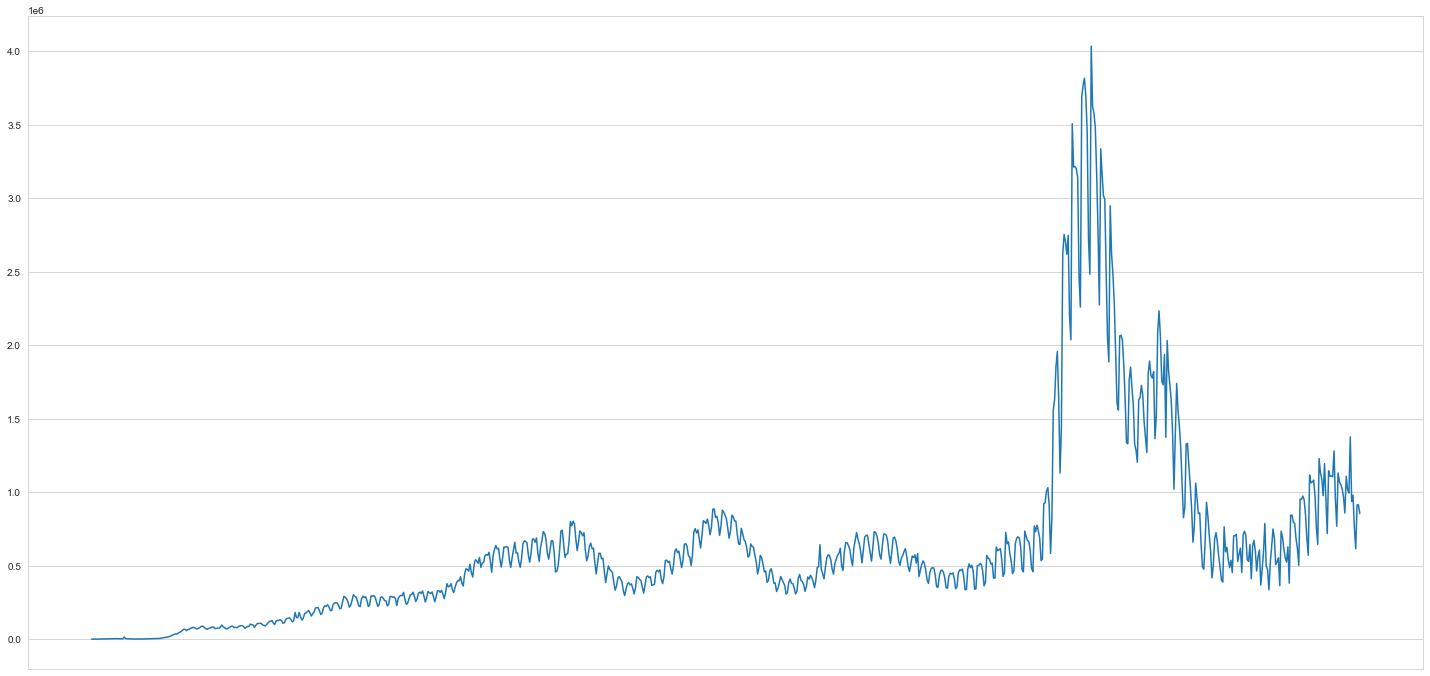

In [44]:
# 전세계 일단위 신규발생 확진자 수 그래프로 표현
sns.set_style('whitegrid')
plt.figure(figsize=(25,12))
plt.plot(global_day_cases.index, global_day_cases.values)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

In [45]:
# 전세계 월단위 신규발생 확진자 수
global_month_cases = df_corona2.groupby(by='월단위 일자')['확진자'].sum()

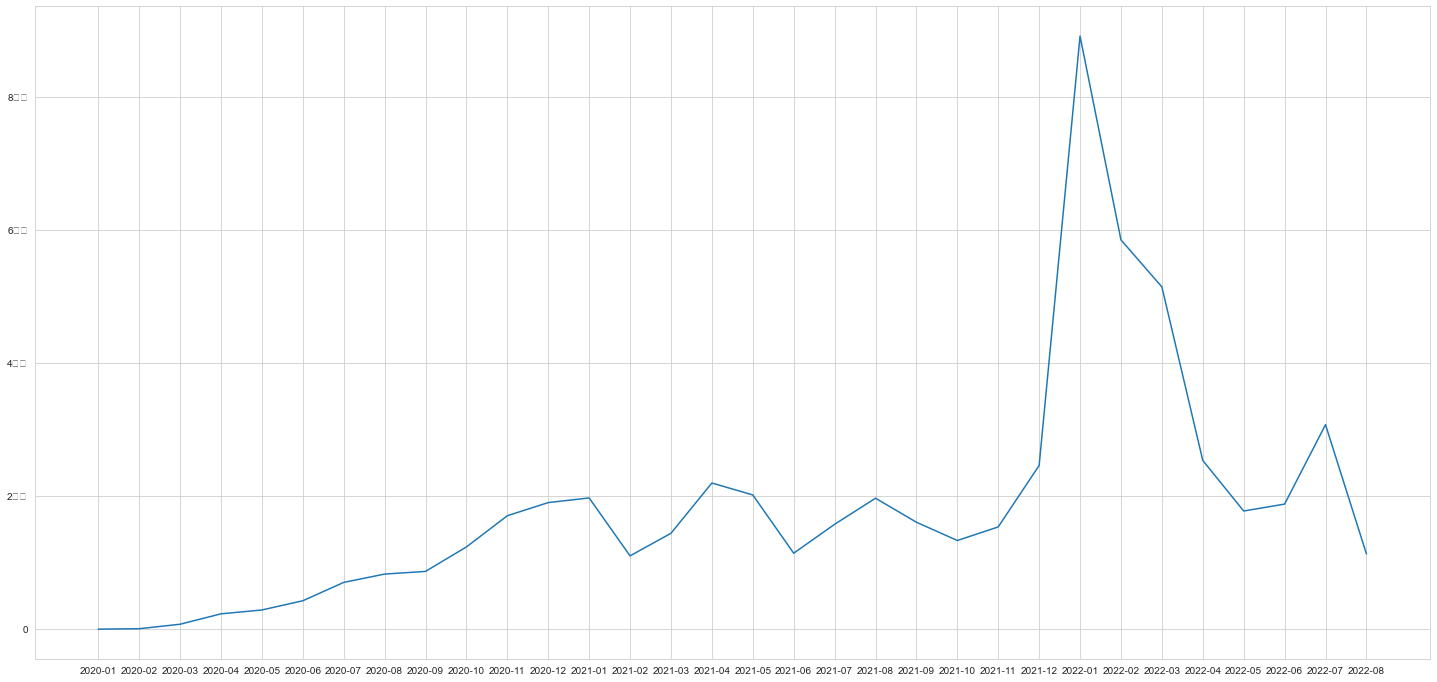

In [46]:
# 전세계 월단위 신규발생 확진자 수 그래프로 표현
sns.set_style('whitegrid')
plt.figure(figsize=(25,12))
plt.plot(global_month_cases.index, global_month_cases.values)
plt.yticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])
plt.show()

In [47]:
# 전세계 월단위 사망자 수
global_month_death = df_corona2.groupby(by='월단위 일자')['사망자'].sum()

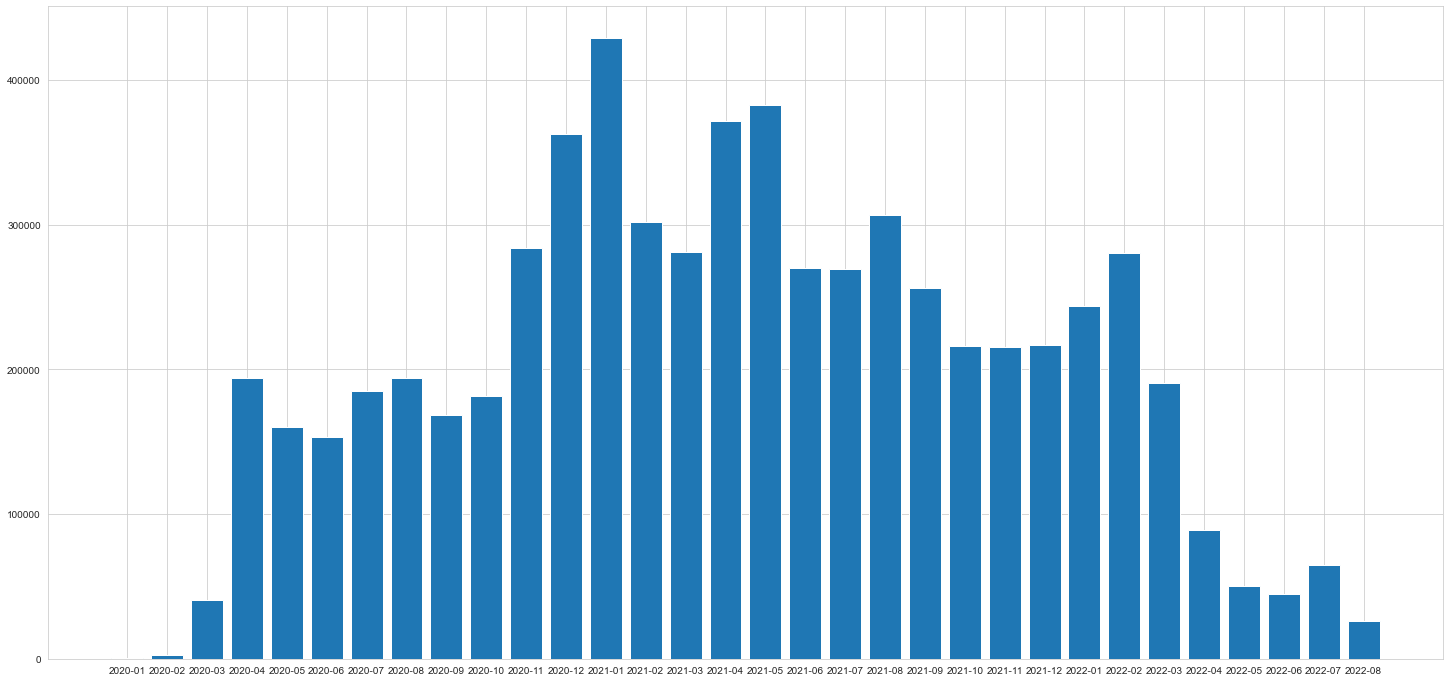

In [48]:
# 전세계 월단위 사망자 수 그래프로 표현
sns.set_style('whitegrid')
plt.figure(figsize=(25,12))
plt.bar(global_month_death.index, global_month_death.values)
plt.yticks(ticks=np.arange(0, 500000, 100000))
plt.show()

In [49]:
# 미국의 월별 코로나 확진자 수
df_us = df_corona2.loc[df_corona2['국가명(한글)'] == '미국']
us_month_cases = df_us.groupby(by='월단위 일자')['확진자'].sum()
us_month_cases

월단위 일자
2020-01           8
2020-02          61
2020-03      173354
2020-04      857488
2020-05      755557
2020-06      820558
2020-07     1884655
2020-08     1524586
2020-09     1201711
2020-10     1816138
2020-11     4375881
2020-12     6171995
2021-01     6285963
2021-02     2464803
2021-03     1776483
2021-04     1832123
2021-05      980861
2021-06      385701
2021-07     1374488
2021-08     4122750
2021-09     4179526
2021-10     2658951
2021-11     2444734
2021-12     5461617
2022-01    20439835
2022-02     4373051
2022-03     1020840
2022-04     1164385
2022-05     2700448
2022-06     3064282
2022-07     3902311
2022-08     1220305
Name: 확진자, dtype: int64

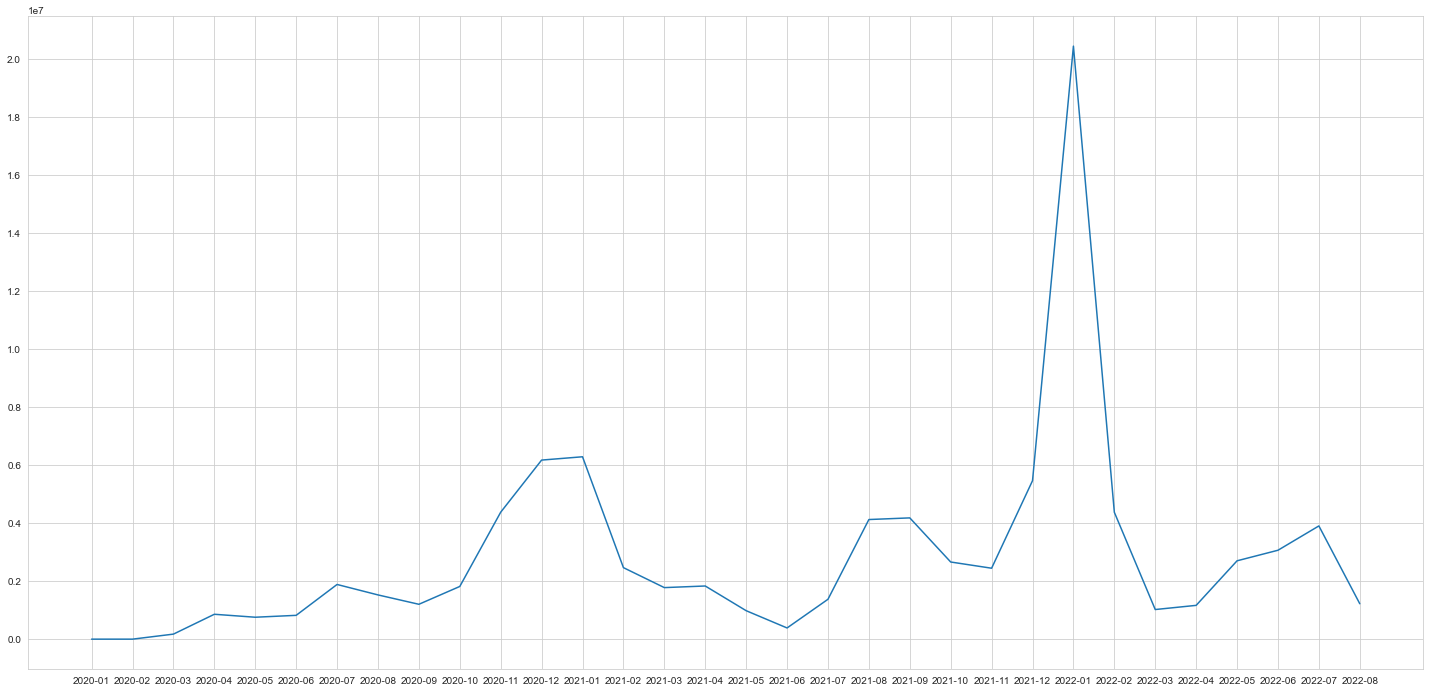

In [50]:
# 미국의 월별 코로나 확진자 수 그래프로 표현
plt.figure(figsize=(25,12))
plt.plot(us_month_cases.index, us_month_cases.values)
plt.yticks(ticks=np.arange(0, 22000000, 2000000))
plt.show()

In [51]:
# 한국의 월별 코로나 확진자 수
df_kr = df_corona2.loc[df_corona2['국가명(한글)'] == '대한민국']
kr_month_cases = df_kr.groupby(by='월단위 일자')['확진자'].sum()
kr_month_cases

월단위 일자
2020-01         10
2020-02       2920
2020-03       6855
2020-04        979
2020-05        703
2020-06       1331
2020-07       1506
2020-08       5642
2020-09       3865
2020-10       2699
2020-11       7688
2020-12      26523
2021-01      17476
2021-02      11467
2021-03      13415
2021-04      18919
2021-05      18339
2021-06      16623
2021-07      41384
2021-08      53075
2021-09      59867
2021-10      53413
2021-11      82527
2021-12     183608
2022-01     214864
2022-02    2288757
2022-03    9961089
2022-04    4142333
2022-05     865740
2022-06     255711
2022-07    1416721
2022-08    1335790
Name: 확진자, dtype: int64

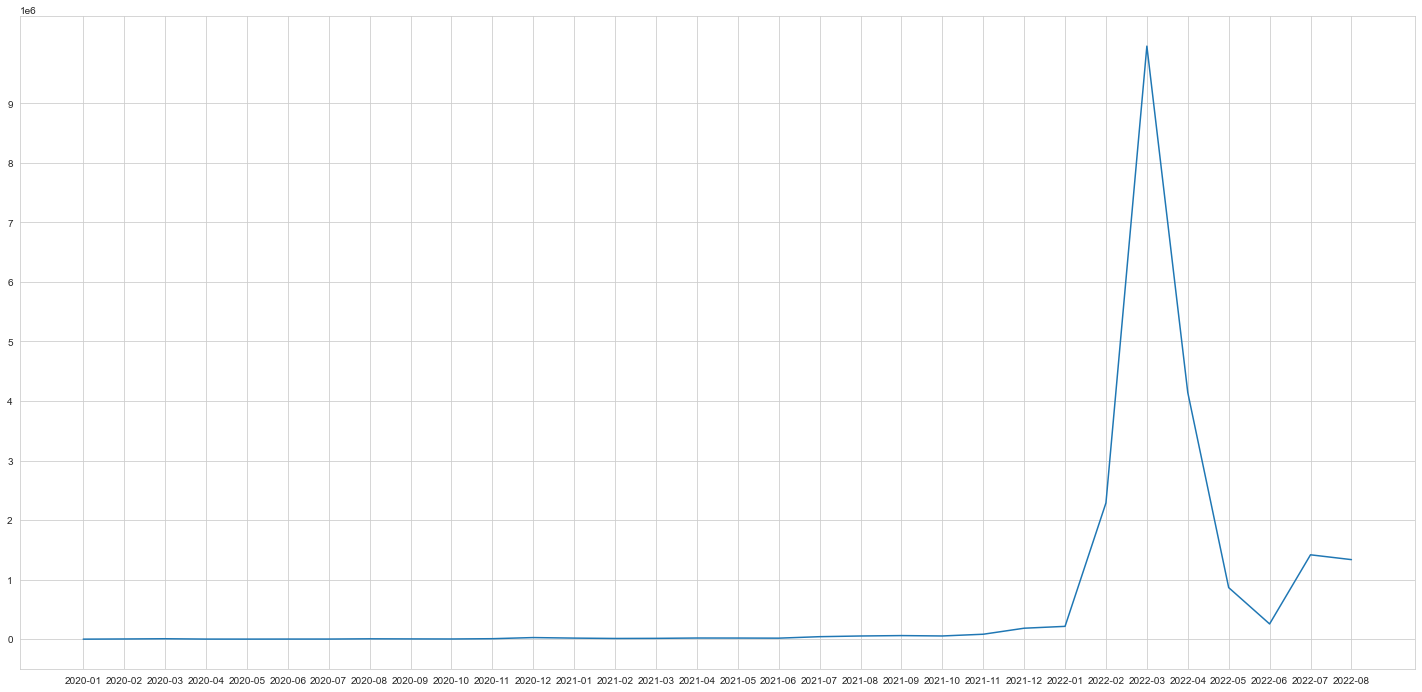

In [52]:
# 한국의 월별 코로나 확진자 수 그래프로 표현
plt.figure(figsize=(25,12))
plt.plot(kr_month_cases.index, kr_month_cases.values)
plt.yticks(ticks=np.arange(0, 10000000, 1000000))
plt.show()

In [53]:
# 수출총괄 데이터 가져오기
df_export_total = pd.read_csv('./data/수출입총괄.csv')

In [54]:
del df_export_total['Unnamed: 0']

In [55]:
df_export_total

,기간,수출건수,수출액
0,2020.01,735116,43103060857
1,2020.02,798774,40911818805
2,2020.03,912933,46167203855
3,2020.04,766175,36270182837
4,2020.05,799280,34854511400
5,2020.06,985852,39214070630
6,2020.07,1031635,42785144050
7,2020.08,932166,39469230580
8,2020.09,1126451,47819947522
9,2020.10,1034425,44818534427


In [56]:
df_period = df_export_total['기간']
df_period

0     2020.01
1     2020.02
2     2020.03
3     2020.04
4     2020.05
5     2020.06
6     2020.07
7     2020.08
8     2020.09
9     2020.10
10    2020.11
11    2020.12
12    2021.01
13    2021.02
14    2021.03
15    2021.04
16    2021.05
17    2021.06
18    2021.07
19    2021.08
20    2021.09
21    2021.10
22    2021.11
23    2021.12
24    2022.01
25    2022.02
26    2022.03
27    2022.04
28    2022.05
29    2022.06
30    2022.07
Name: 기간, dtype: float64

In [57]:
df_period = dict(df_period.astype(str)) # 문자열로 형변환

In [58]:
for i, p in df_period.items():
    df_period[i] = p.replace('.', '-')
    if len(p) == 6:
        df_period[i] += '0'
df_period

{0: '2020-01',
 1: '2020-02',
 2: '2020-03',
 3: '2020-04',
 4: '2020-05',
 5: '2020-06',
 6: '2020-07',
 7: '2020-08',
 8: '2020-09',
 9: '2020-10',
 10: '2020-11',
 11: '2020-12',
 12: '2021-01',
 13: '2021-02',
 14: '2021-03',
 15: '2021-04',
 16: '2021-05',
 17: '2021-06',
 18: '2021-07',
 19: '2021-08',
 20: '2021-09',
 21: '2021-10',
 22: '2021-11',
 23: '2021-12',
 24: '2022-01',
 25: '2022-02',
 26: '2022-03',
 27: '2022-04',
 28: '2022-05',
 29: '2022-06',
 30: '2022-07'}

In [59]:
df_export_total['기간'] = df_period.values()

In [60]:
df_export_total

,기간,수출건수,수출액
0,2020-01,735116,43103060857
1,2020-02,798774,40911818805
2,2020-03,912933,46167203855
3,2020-04,766175,36270182837
4,2020-05,799280,34854511400
5,2020-06,985852,39214070630
6,2020-07,1031635,42785144050
7,2020-08,932166,39469230580
8,2020-09,1126451,47819947522
9,2020-10,1034425,44818534427


In [61]:
# 전세계 월단위 신규발생 확진자 수
global_month_cases = df_corona2.groupby(by='월단위 일자')['확진자'].sum()

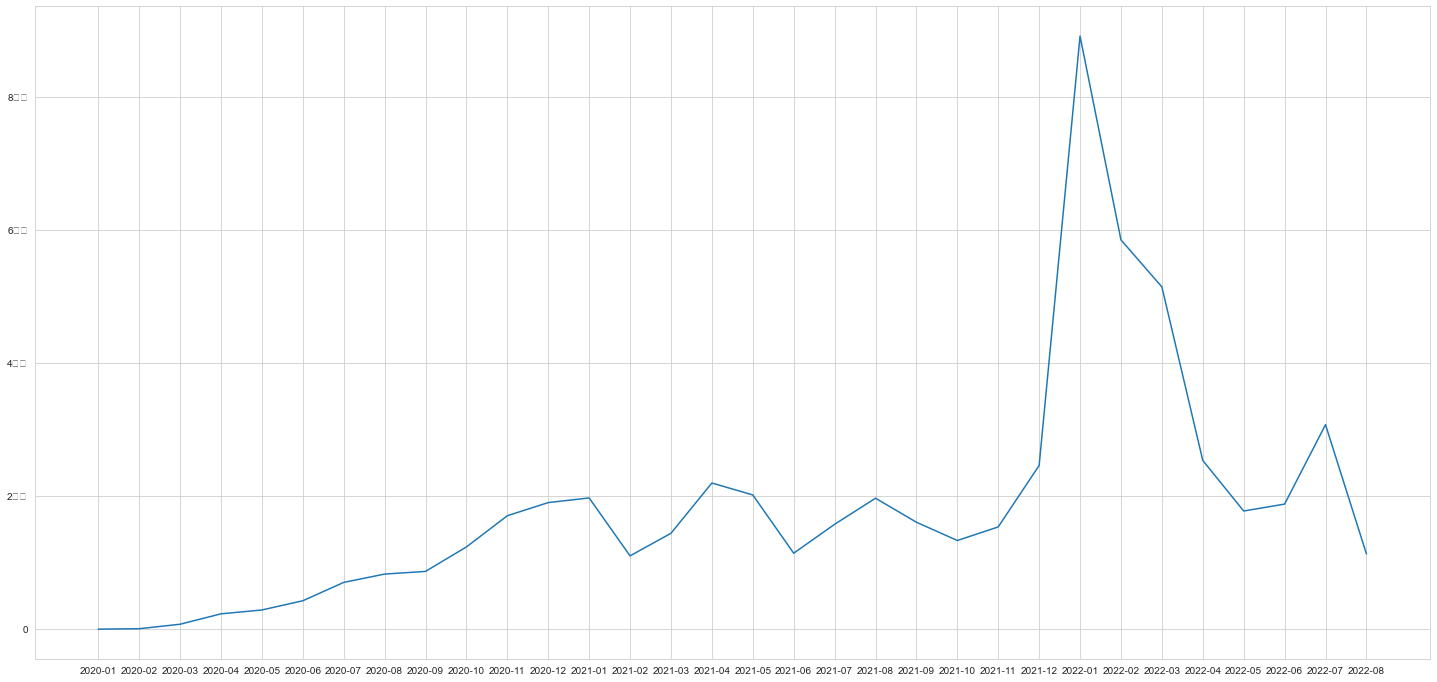

In [62]:
plt.figure(figsize=(25,12))
plt.plot(global_month_cases.index, global_month_cases.values)
plt.yticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])
plt.show()

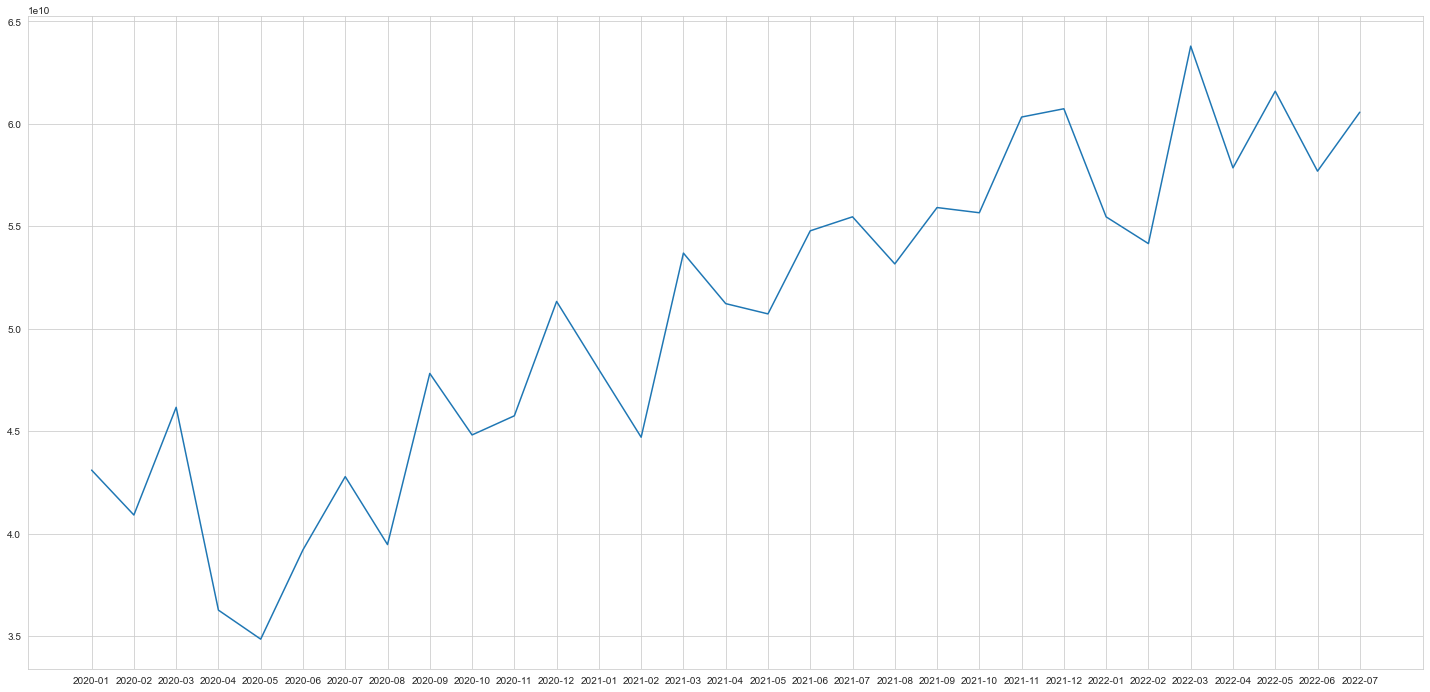

In [63]:
# 월 단위 수출 총액
plt.figure(figsize=(25,12))
plt.plot(df_export_total['기간'], df_export_total['수출액'])
plt.show()

In [64]:
from scipy.stats import *

# 전세계 확진자 수 대비 총 수출액의 상관계수
print(pearsonr(global_month_cases.values[:-1], df_export_total['수출액'])) 

(0.5427969392422917, 0.0016050299683025282)


Text(0, 0.5, '수출액')

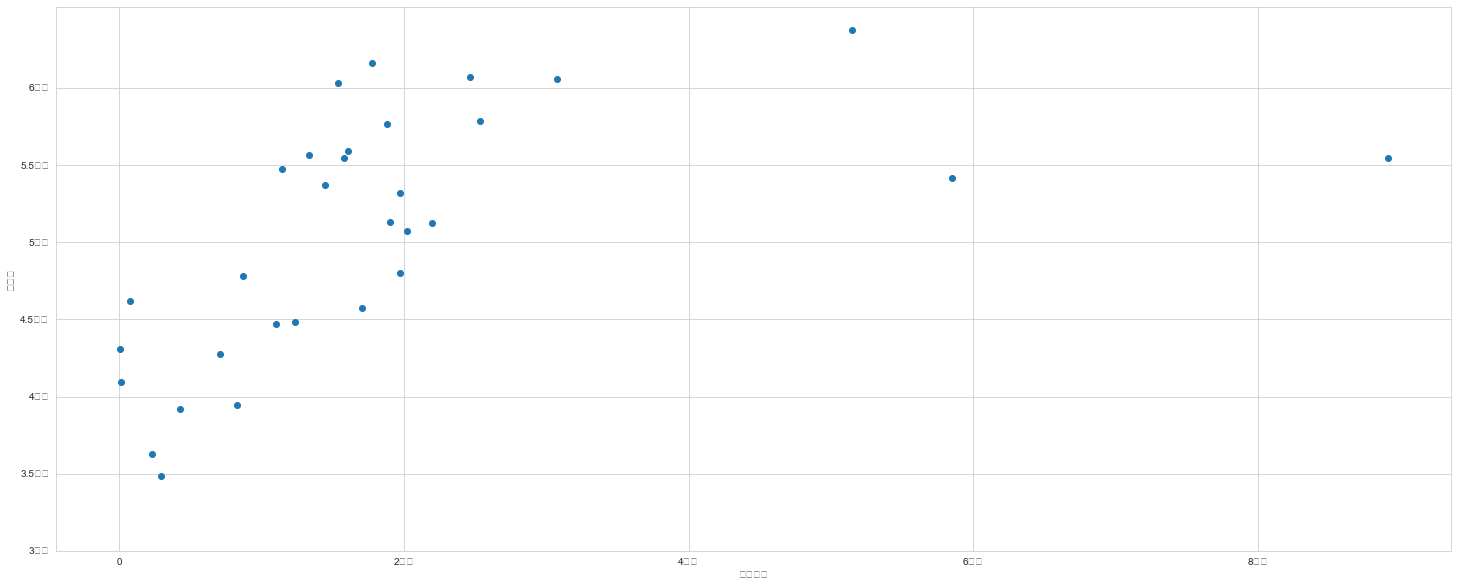

In [65]:
# 전세계 확진자 수 대비 총 수출액에 대한 scatter그래프
plt.figure(figsize=(25, 10))
plt.scatter(global_month_cases.values[:-1], df_export_total['수출액'])
plt.xticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])
plt.xlabel('확진자수')
plt.yticks(ticks=np.arange(30000000000, 65000000000, 5000000000), labels=['3백억','3.5백억','4백억','4.5백억', '5백억', '5.5백억','6백억'])
plt.ylabel('수출액')

In [66]:
# 한국의 월별 코로나 확진자 수
df_kr = df_corona2.loc[df_corona2['국가명(한글)'] == '대한민국']
kr_month_cases = df_kr.groupby(by='월단위 일자')['확진자'].sum()
kr_month_cases

월단위 일자
2020-01         10
2020-02       2920
2020-03       6855
2020-04        979
2020-05        703
2020-06       1331
2020-07       1506
2020-08       5642
2020-09       3865
2020-10       2699
2020-11       7688
2020-12      26523
2021-01      17476
2021-02      11467
2021-03      13415
2021-04      18919
2021-05      18339
2021-06      16623
2021-07      41384
2021-08      53075
2021-09      59867
2021-10      53413
2021-11      82527
2021-12     183608
2022-01     214864
2022-02    2288757
2022-03    9961089
2022-04    4142333
2022-05     865740
2022-06     255711
2022-07    1416721
2022-08    1335790
Name: 확진자, dtype: int64

In [67]:
# 한국의 확진자 수 대비 총 수출액의 상관계수
print(pearsonr(kr_month_cases.values[:-1], df_export_total['수출액'])) 

(0.4348721033454769, 0.014492560683588557)


Text(0, 0.5, '수출액')

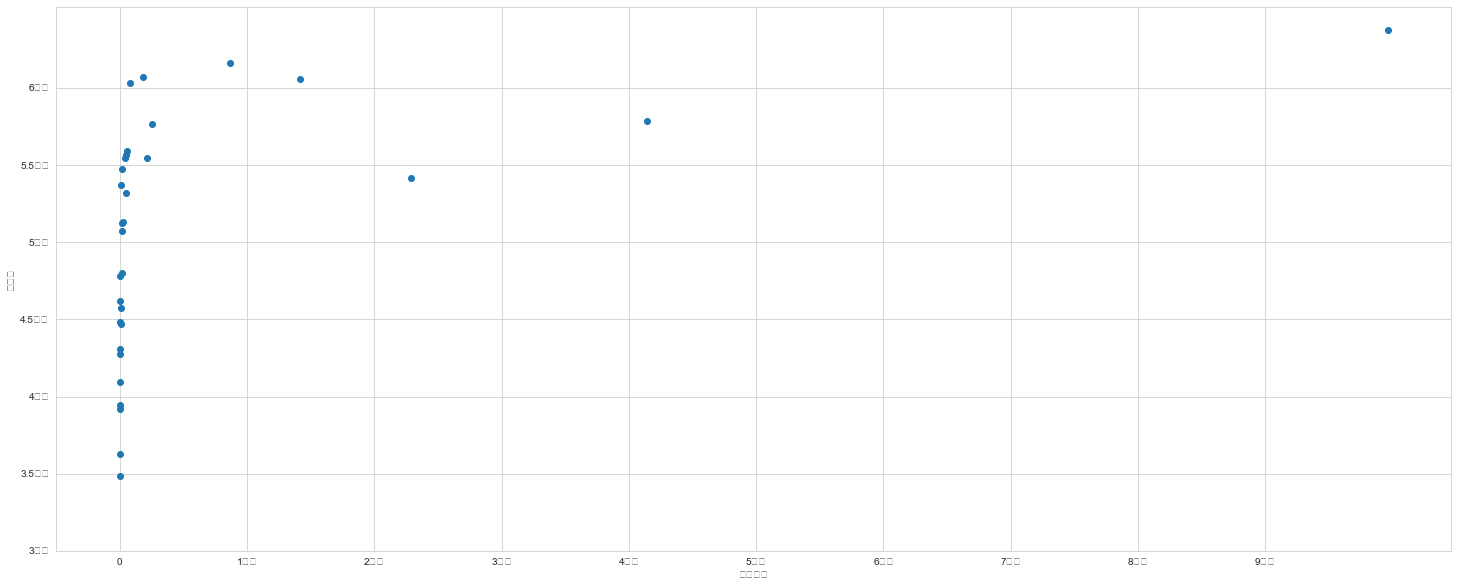

In [68]:
# 한국의 확진자 수 대비 총 수출액에 대한 scatter그래프
plt.figure(figsize=(25, 10))
plt.scatter(kr_month_cases.values[:-1], df_export_total['수출액'])
plt.xticks(ticks=np.arange(0, 10000000, 1000000), labels=['0','1백만','2백만','3백만','4백만','5백만','6백만','7백만','8백만','9백만'])
plt.xlabel('확진자수')
plt.yticks(ticks=np.arange(30000000000, 65000000000, 5000000000), labels=['3백억','3.5백억','4백억','4.5백억', '5백억', '5.5백억','6백억'])
plt.ylabel('수출액')